## Observations and Insights 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata,study_results,on='Mouse ID')

# Display the data table for preview
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# Checking the number of mice.
mouse_count = study_df['Mouse ID'].nunique()
print(f'There are {mouse_count} used in this pharmaceutical study')

There are 249 used in this pharmaceutical study


In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse = study_df[study_df.duplicated(subset=['Mouse ID','Timepoint'],keep='first')]
duplicate_mouse = duplicate_mouse[['Mouse ID','Timepoint']].groupby(['Mouse ID']).count()

print(f'Duplicate mouse ID is {duplicate_mouse.index.values[0]}')

Duplicate mouse ID is g989


In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_df.loc[study_df["Mouse ID"] == duplicate_mouse.index.values[0], :]
print('Duplicate study data based on timepoint and mouse id is as follows:')

pd.set_option('display.max_rows', None)
duplicate_mouse_data


Duplicate study data based on timepoint and mouse id is as follows:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study_df = study_df.loc[study_df["Mouse ID"] != "g989", :]
clean_study_df.reset_index(inplace=True)
clean_study_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = clean_study_df['Mouse ID'].nunique()
print(f'There are {mouse_count_clean} used in the clean pharmaceutical study. The duplicate mouse is dropped')

There are 248 used in the clean pharmaceutical study. The duplicate mouse is dropped


## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_mean      = clean_study_df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).mean().rename(columns={'Tumor Volume (mm3)': 'MEAN Tumor Volume (mm3)'})
tumor_median    = clean_study_df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).median().rename(columns={'Tumor Volume (mm3)': 'MEDIAN Tumor Volume (mm3)'})
tumor_variance  = clean_study_df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).var().rename(columns={'Tumor Volume (mm3)': 'VARIANCE Tumor Volume (mm3)'})
tumor_stddev    = clean_study_df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).std().rename(columns={'Tumor Volume (mm3)': 'STD DEV Tumor Volume (mm3)'})
tumor_sem       = clean_study_df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).sem().rename(columns={'Tumor Volume (mm3)': 'SEM Tumor Volume (mm3)'})

tumor_stat_df   = pd.merge(tumor_mean,tumor_median, on='Drug Regimen',how='outer')
tumor_stat_df   = pd.merge(tumor_stat_df,tumor_variance, on='Drug Regimen',how='outer')
tumor_stat_df   = pd.merge(tumor_stat_df,tumor_stddev, on='Drug Regimen',how='outer')
tumor_stat_df   = pd.merge(tumor_stat_df,tumor_sem, on='Drug Regimen',how='outer')

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_stat_df

,MEAN Tumor Volume (mm3),MEDIAN Tumor Volume (mm3),VARIANCE Tumor Volume (mm3),STD DEV Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_agg_df = clean_study_df.groupby(['Drug Regimen']).agg( {'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']}).rename(columns={'mean': 'MEAN Tumor Volume (mm3)',
                                                                                                                                            'median':'MEDIAN Tumor Volume (mm3)',
                                                                                                                                            'var':'VARIANCE Tumor Volume (mm3)',
                                                                                                                                            'std':'STD DEV Tumor Volume (mm3)',
                                                                                                                                            'sem':'SEM DEV Tumor Volume (mm3)' })
tumor_agg_df.columns = tumor_agg_df.columns.droplevel()
tumor_agg_df
# This method produces everything in a single groupby function



,MEAN Tumor Volume (mm3),MEDIAN Tumor Volume (mm3),VARIANCE Tumor Volume (mm3),STD DEV Tumor Volume (mm3),SEM DEV Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

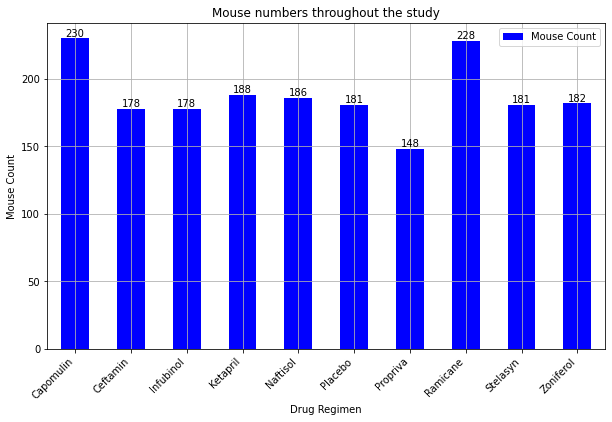

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

panda_bar_df = clean_study_df[['Drug Regimen','Mouse ID']].groupby(['Drug Regimen']).count()

multi_plot = panda_bar_df.plot(kind="bar", figsize=(10,6), color='b', width= 0.5)

multi_plot.set_xticklabels(panda_bar_df.index, rotation=45,horizontalalignment="right")
multi_plot.set_title('Mouse numbers throughout the study')
multi_plot.set_xlabel('Drug Regimen')
multi_plot.set_ylabel('Mouse Count')
multi_plot.legend(["Mouse Count"])
multi_plot.grid()

for container in multi_plot.containers:
    multi_plot.bar_label(container)




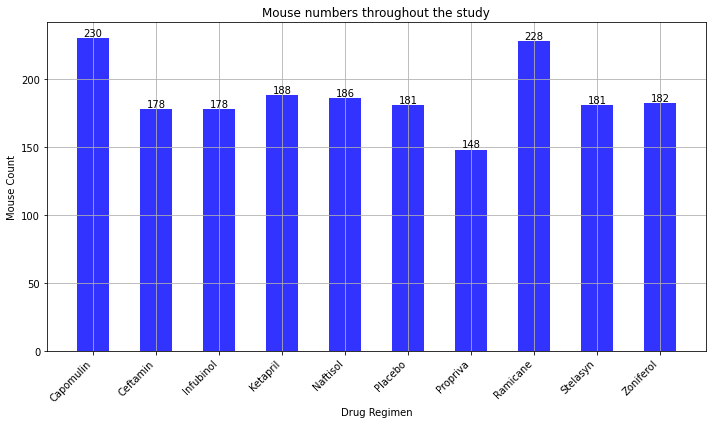

In [28]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(panda_bar_df))
tick_locations = [value for value in x_axis]

f, ax = plt.subplots(figsize=(10,6)) 

plt.bar(x_axis, panda_bar_df["Mouse ID"], width= 0.5,color='b', alpha=0.8, align="center")
plt.xticks(tick_locations, panda_bar_df.index, rotation=45,horizontalalignment="right")

plt.title("Mouse numbers throughout the study")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")

for container in multi_plot.containers:
    plt.bar_label(container)

plt.grid()
plt.tight_layout()
plt.show()

Text(0, 0.5, '')

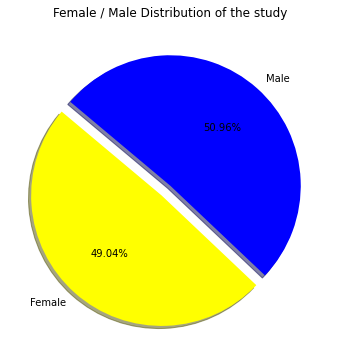

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

panda_pie = clean_study_df.groupby('Sex')['Mouse ID'].count()
panda_pie.head()

colors = ['yellow', 'blue']
explode = (0.1,0)

ax = panda_pie.plot(kind='pie', autopct='%1.2f%%',
                                colors = colors,
                                subplots=False,
                                shadow = True,
                                figsize=(10,6),
                                labels = panda_pie.index, 
                                explode=explode,
                                legend = False,       
                                startangle = 140,                      
                                title='Female / Male Distribution of the study')

ax.set_ylabel('')

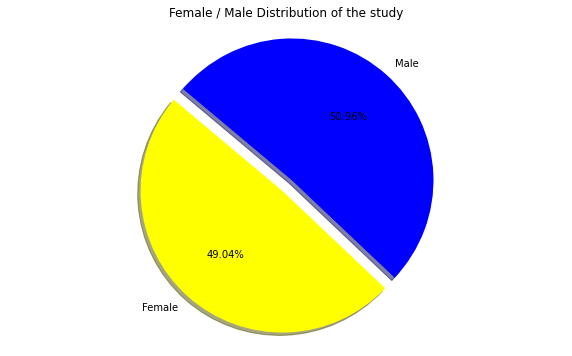

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['yellow', 'blue']
explode = (0.1,0)

f, ax = plt.subplots(figsize=(10,6)) 

plt.pie(panda_pie, 
        autopct='%1.2f%%',
        colors = colors,
        shadow = True,
        labels = panda_pie.index, 
        explode=explode,
        startangle = 140 )

plt.axis("equal")
ax.set_ylabel('')

plt.title("Female / Male Distribution of the study")
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
drug_volume_df = clean_study_df.loc[clean_study_df["Drug Regimen"].isin(drugs), :]
drug_volume_df = pd.DataFrame(drug_volume_df.groupby('Mouse ID')['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
latest_volume_df = pd.merge(drug_volume_df,clean_study_df, on = ['Mouse ID','Timepoint'] ).rename(columns={'Tumor Volume (mm3)':'Final Tumor Volume (mm3)'})
latest_volume_df.drop(['Sex', 'Age_months','index','Weight (g)'], axis=1, inplace=True)

latest_volume_df.head()



,Mouse ID,Timepoint,Drug Regimen,Final Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,67.973419,2
1,a251,45,Infubinol,65.525743,1
2,a275,45,Ceftamin,62.999356,3
3,a411,45,Ramicane,38.407618,1
4,a444,45,Ramicane,43.047543,0


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = latest_volume_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
drug_volume_list = []
drug_labels_list = []

for drug in drug_list:

    drug_labels_list.append(drug)    #display the labels on the right place

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    temp_df = latest_volume_df.loc[latest_volume_df["Drug Regimen"]==drug, :]    
    quartiles = temp_df['Final Tumor Volume (mm3)'].quantile([.25,.5,.75])
    
    # add subset 

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds

    print(f"   --------- {drug} ---------")        
    print(f"    The interquartile range of occupancy (IQR) is: {iqr}")    
    print(f"    Values below {lower_bound} could be outliers.")
    print(f"    Values above {upper_bound} could be outliers.")


    outliers = temp_df.loc[(temp_df['Final Tumor Volume (mm3)'] < lower_bound) | (temp_df['Final Tumor Volume (mm3)'] > upper_bound)]
    outlier_dsp = outliers[['Mouse ID','Timepoint','Final Tumor Volume (mm3)']]
    
    if outliers["Mouse ID"].count() == 0:
        print("    There are no potential outliers in this group") 
    elif outliers["Mouse ID"].count() == 1:
        print(f"    The potential outlier is as follows:")
        print("")    
        print(f"    {outlier_dsp}")
    else:    
        print(f"    The potential outliers are as follows:")
        print("")    
        print(f"    {outlier_dsp}")
    
    print("")

    temp_df = temp_df.loc[:,"Final Tumor Volume (mm3)"]
    drug_volume_list.append(temp_df)


   --------- Infubinol ---------
    The interquartile range of occupancy (IQR) is: 11.477135160000003
    Values below 36.83290494999999 could be outliers.
    Values above 82.74144559000001 could be outliers.
    The potential outlier is as follows:

       Mouse ID  Timepoint  Final Tumor Volume (mm3)
15     c326          5                 36.321346

   --------- Ceftamin ---------
    The interquartile range of occupancy (IQR) is: 15.577752179999997
    Values below 25.355449580000002 could be outliers.
    Values above 87.66645829999999 could be outliers.
    There are no potential outliers in this group

   --------- Ramicane ---------
    The interquartile range of occupancy (IQR) is: 9.098536719999998
    Values below 17.912664470000003 could be outliers.
    Values above 54.30681135 could be outliers.
    There are no potential outliers in this group

   --------- Capomulin ---------
    The interquartile range of occupancy (IQR) is: 7.781863460000004
    Values below 20.70456

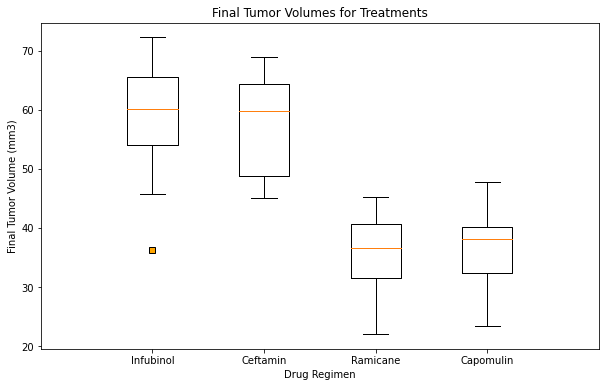

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax = plt.subplots(figsize=(10,6))

ax.set_title('Final Tumor Volumes for Treatments')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel("Drug Regimen")

labelnumbers = [ x+1 for x in range(len(drug_list)) ]

outlier = dict(markerfacecolor='orange',  marker='s')


bp = ax.boxplot(drug_volume_list, flierprops=outlier)

plt.xticks(labelnumbers, drug_labels_list)

ax.set_xlim(0, len(drug_list) + 1)

plt.show()

## Line and Scatter Plots

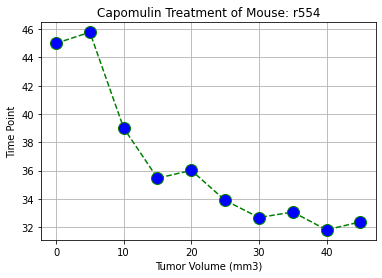

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin_df = clean_study_df.loc[study_df["Drug Regimen"] == 'Capomulin', :]

#Choosing a random mouse from the Capomulin study
m_mouse_id = random.choice(Capomulin_df['Mouse ID'].unique()) 
mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == m_mouse_id, :]

plt.plot(mouse_df.Timepoint, mouse_df['Tumor Volume (mm3)'], color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12)
plt.grid()

plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Time Point")
plt.title('Capomulin Treatment of Mouse: '+ m_mouse_id)

plt.show()

Text(0.5, 1.0, 'Average Tumor Volume by Weight for Capomulin treatment')

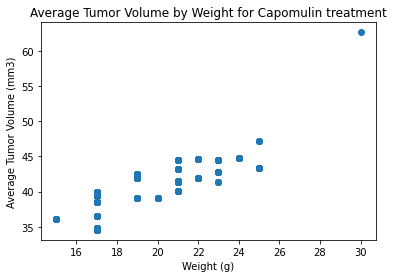

In [35]:

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

avg_df = pd.DataFrame(Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})
avg_df = pd.merge(Capomulin_df,avg_df,on='Mouse ID')
avg_df

plt.scatter(avg_df['Weight (g)'], avg_df['Average Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight for Capomulin treatment')



## Correlation and Regression

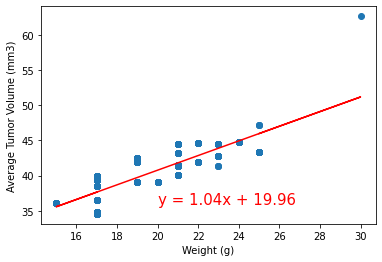

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = avg_df['Weight (g)']
y_values = avg_df['Average Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
